# Predicting Heart Disease using machine learning

this notebook looks into using various python Python-based machine learning 
and data science libraries in an attempt to build a machine Learning model capable 
of predicting whether or not somenone has heart disease based on their medical attributes.

We are going to take the following approach:
    1. Problem defination
    2. Data
    3. Evaluation
    4. Features
    5. Modelling 
    6. Experimentation
    
    ## Problem Defination
    
    In a statement,
    -> Given Clinincal parameters about a patient, can we predict whether or not they have heart disease?
   
   ## Data 
    the original data came from Cleavland data from the UCI Machine Learning Repository.
    
    there is also a version of it available on Kaggle.
    
  ## Evaluation


    if we reach 95% accuracy at predicting whether or not a patient has heart disease
    during the proof of concept, we will pursue the project.
    
 ##  Features
    
    this is where you'll get different information about each of the feature in your data.

Create data dictionary

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    0: Typical angina: chest pain related decrease blood supply to the heart
    1: Atypical angina: chest pain not related to heart
    2: Non-anginal pain: typically esophageal spasms (non heart related)
    3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    serum = LDL + HDL + .2 * triglycerides
     above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
   '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    0: Nothing to note
    1: ST-T Wave abnormality
       can range from mild symptoms to severe problems
       signals non-normal heart beat
    2: Possible or definite left ventricular hypertrophy
       Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will     stress more
11. slope - the slope of the peak exercise ST segment
    0: Upsloping: better heart rate with excercise (uncommon)
    1: Flatsloping: minimal change (typical healthy heart)
    2: Downslopins: signs of unhealthy heart

12. ca - number of major vessels (0-3) colored by flourosopy
         colored vessel means the doctor can see the blood passing through
         the more blood movement the better (no clots)
13. thal - thalium stress result
     1,3: normal
     6: fixed defect: used to be defect but ok now
     7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)
    

## Prepraing the tools

 we'are going to use pandas, matplotlib and Numpy for the data analysis and manipulation.
 

In [108]:
# Import all the tools we need.
# Regular EDA (exploratory data analysis) and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve



## Load Data 

In [2]:
df=pd.read_csv("heart-disease.csv")

In [3]:
df.shape # (rows, columns)

(303, 14)

## Data Exploration (EDA or exploratory data analysis)

The goal here is to find out more about the data and become a subject matter
expert on the data set you are working with.

1. what question are you trying to solve?
2. what kind of data do we have and how do we treat different types?
3. what's missing from the data and how do you deal with it?
4. where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

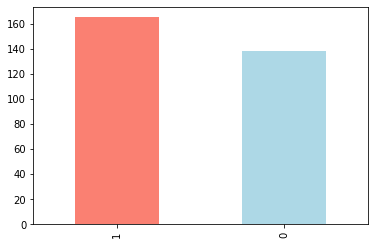

In [7]:
df["target"].value_counts().plot(kind="bar",color=("salmon","lightblue"));

In [8]:
df.info() # different information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [9]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex

In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
# Compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


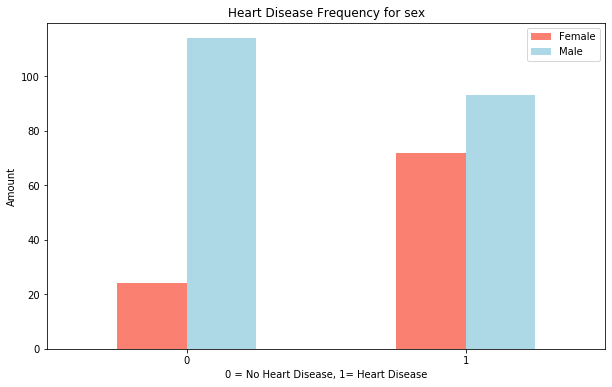

In [13]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),
                                  color=["salmon","lightblue"]);
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No Heart Disease, 1= Heart Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

### Age vs Max heart Rate for Heart disease.

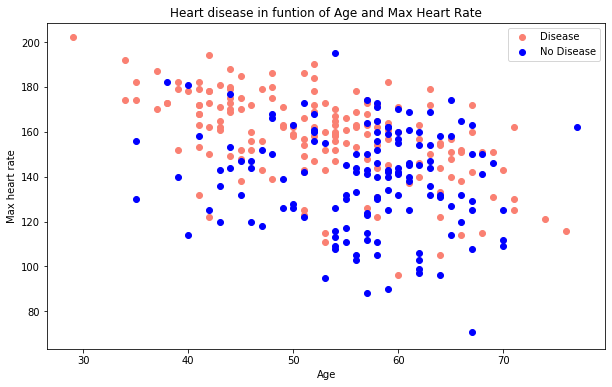

In [14]:
# create another figure
plt.figure(figsize=(10,6))

# scatter with positive examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon")

# scatter with negative examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="blue")
plt.title("Heart disease in funtion of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Disease","No Disease"]);

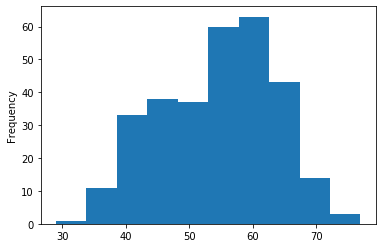

In [15]:
# check the distribution of the age column with a histogram
df.age.plot.hist();


### Heart Disease Frequency per chest pain type
cp - chest pain type 
0: Typical angina: chest pain related decrease blood supply to the heart 
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related) 
3: Asymptomatic: chest pain not showing signs of disease

In [16]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


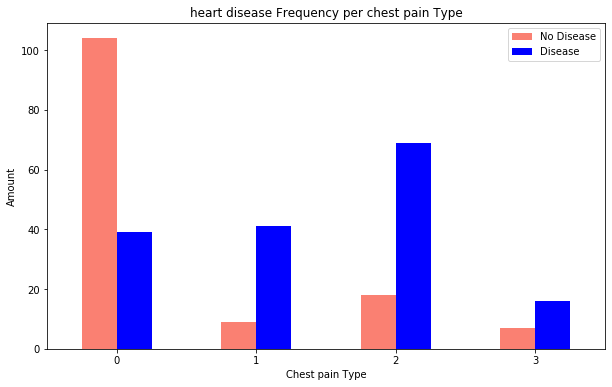

In [17]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["salmon","blue"])
plt.title("heart disease Frequency per chest pain Type")
plt.xlabel("Chest pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);


In [18]:
# Maek a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


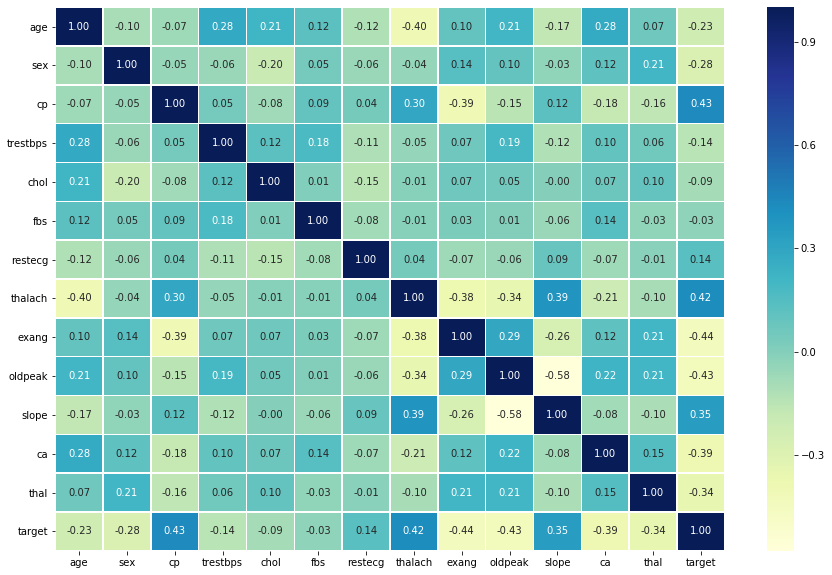

In [19]:
# let's make our correlation matrix a little prettier
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu");

## 5. Modelling 

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# split data into x and y
x=df.drop("target",axis=1)
y=df["target"]

In [22]:
# split data into train and test sets
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


Now we have splitted our data into train and test set and now 
we will us it to machine learning model to prediction and training

we are going to try 3 different models

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [23]:
# put models in a dictionary
models={"logistic Regression":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier()}

# Create a function to fit and score models

def fit_and_score(models,x_train,x_test,y_train,y_test):
    """fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    x_train : training data (no labels)
    x_test:testing data (no labels)
    y_train: training labels
    y_test : test labels
    """
    # set random seed
    np.random.seed(42)
    # make a dictionary to keep model scores
    model_scores={}
    # loop through models
    for name, model in models.items():
        #fit the model to the data
        model.fit(x_train,y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name]=model.score(x_test,y_test)
        
    return model_scores

In [24]:
model_scores=fit_and_score(models=models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)
model_scores

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'logistic Regression': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8524590163934426}

# model comparison

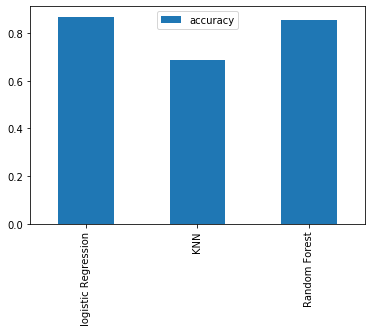

In [25]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

Now we have got a baseline model.... and we know a model's first
predictions aren't always what we should based our next steps off.
what should do?

let's look at the following:

1. Hyperparameter tuning
2. Feature importance
3. Confusion matrix
4. cross-validation
5. Precision
6. Recall
7. F1 Score
8. Classification report
9. ROC Curve
10. Area under the curve (AUC)


## Hyperparameter tuning by Hand 

In [26]:
# Let's tune KNN
train_scores=[]
test_scores=[]

# Create a list of different values for n_neighbors
neighbours=range(1,21)

# Setup KNN instance
knn=KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbours:
    knn.set_params(n_neighbors=i)
    
    # fit the algorithms
    knn.fit(x_train,y_train)
    
    # update the training scores list
    train_scores.append(knn.score(x_train,y_train))
    
    # update the test scores list
    test_scores.append(knn.score(x_test,y_test))

In [27]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [28]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data :75.41%


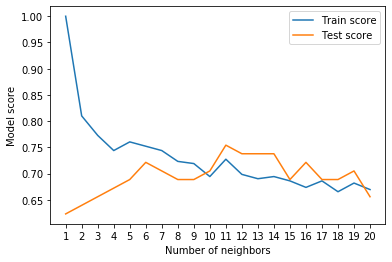

In [29]:
plt.plot(neighbours,train_scores, label="Train score")
plt.plot(neighbours,test_scores,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f'Maximum KNN score on the test data :{max(test_scores)*100:.2f}%')

## Hyperparameter tuning for RandomizedSearchCV 

we are going to tune :
1. LogisticRegression()
2. RandomForestClassifier()

In [44]:
# Create a hyperparameter grid for LogisticRegression
logistic_Grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}

# create a hyperparameter grid for RandomForestorClassifier
rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth" :[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}



Now we've got hyperparameter grids of each of our models, let's tune them using
RandomizedSearchCV....

In [45]:
# Tune LogisticRegression
np.random.seed(42)

# setup random hyperparameter search for Logistic regression

rs_Log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=logistic_Grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# fit random hyperparameter Search Model for Logistic Regrssion
rs_Log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distributi...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [46]:
rs_Log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [47]:
rs_Log_reg.score(x_test,y_test)

0.8852459016393442

now we have tuned logistic regression and now try Random forest classifier.

In [53]:
# Setup radomseed

np.random.seed(42)

#Setup random hyperparameter search for RandomForestClassifier

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)

# fit random hyperparameter search model for Random forest class
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   37.0s finished
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [54]:
# find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 12,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [55]:
# evaluating the randomized search RandomForestClassifier model.

rs_rf.score(x_test,y_test)

0.8688524590163934

In [56]:
model_scores

{'logistic Regression': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8524590163934426}

#### GridSearchCV to do hyperparameter tuning.
since our logistic Regression model provide best result
we use GridSearchCV for logistic Regression.


In [63]:
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}

# Setup grid hyperparameter Search for Logistic Regression

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train,y_train);


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [66]:
# check the best parameter

gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [67]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy

*Roc curve
*Confusion matrix
*Classification report
*Precision
*Recall
*f1-score

and it will be great to use cross-validation was used where possible

In [69]:
# make prediction with tunned model
y_preds=gs_log_reg.predict(x_test)

In [70]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [71]:
y_test

179    0
228    0
111    1
246    0
60     1
9      1
119    1
223    0
268    0
33     1
5      1
101    1
45     1
175    0
118    1
46     1
125    1
192    0
285    0
279    0
152    1
269    0
272    0
25     1
146    1
283    0
254    0
73     1
231    0
109    1
      ..
284    0
198    0
42     1
17     1
168    0
76     1
90     1
24     1
57     1
92     1
77     1
137    1
116    1
7      1
251    0
281    0
78     1
292    0
232    0
219    0
255    0
63     1
82     1
236    0
204    0
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [112]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


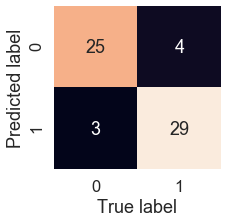

In [116]:
sns.set(font_scale=1.5)

def plt_conf_mat(y_test,y_preds):
    """
    Plot a nice looking confusion matrix using searborn's heatmap()
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")


plt_conf_mat(y_test,y_preds)

In [117]:
# classification report.
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



#### calculate evalation metrics using cross validation

we are going to calculate precision, recall, and f1 score of our model using cross validation and to
do so we'll be using cross_val_score().



In [119]:
# check best hyperparameters.
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [122]:
# create new classifier with best parameters
clf=LogisticRegression(C=0.20433597178569418, solver="liblinear")
# cross validated accuracy
cv_acc=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc.mean()

0.8446994535519124

In [123]:
# cross-validated precision
cv_precision=cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision.mean()


0.8207936507936507

In [124]:
# Cross-validated recall
cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall.mean()

0.9212121212121213

In [127]:
# Cross-validated f1-score
cv_f1score=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_f1score.mean()

0.8446994535519124

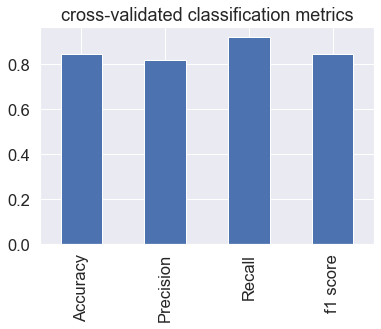

In [132]:
# Visualize cross-validated metrics
cv_metrics=pd.DataFrame({ "Accuracy":cv_acc.mean(),
                         "Precision":cv_precision.mean(),
                         "Recall":cv_recall.mean(),
                         "f1 score":cv_f1score.mean()},
                        index=[0])
cv_metrics.T.plot.bar(title="cross-validated classification metrics"
                     ,legend=False )


### Feature Importance

feature importance is another as asking, " which feature contributed most to the outcomes of the model and how did they contribute?"

finding feature importance is different for each machine learning model. One way to find feature
importance is to search for "(model name) feature importance."

Let find the feature importance for our logisticRegression model...


In [134]:
# fit an instance of LogisticRegression
clf=LogisticRegression(C=0.2433597178569418, solver="liblinear")

clf.fit(x_train,y_train);

In [135]:
# check coef_
clf.coef_

array([[ 0.00386198, -0.91787945,  0.68007948, -0.01162877, -0.00171635,
         0.04974621,  0.34125464,  0.02476716, -0.6394523 , -0.578147  ,
         0.47755838, -0.65640568, -0.70540941]])

In [136]:
# match coef's of feature to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0038619761880679185,
 'sex': -0.9178794462508733,
 'cp': 0.6800794808673629,
 'trestbps': -0.011628767121643787,
 'chol': -0.001716351107564237,
 'fbs': 0.049746206337952015,
 'restecg': 0.3412546442110855,
 'thalach': 0.0247671626265218,
 'exang': -0.6394522996313559,
 'oldpeak': -0.5781470007982892,
 'slope': 0.4775583797038366,
 'ca': -0.6564056754970701,
 'thal': -0.7054094111916803}

In [137]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


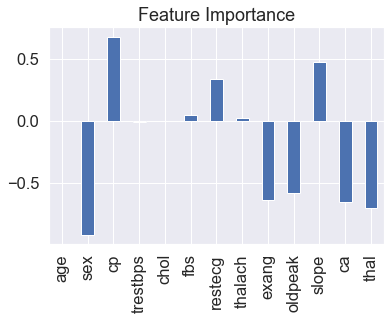

In [138]:
#  visualize feature importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);

In [139]:
pd.crosstab(df['sex'],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [140]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


### Experimentation

If you haven't hit your evaluation metric yet... ask yourslef....

1. could you collect more data?
2. could you try a better model? like catBoost and XGBoost?
3. could you improve the current models? (beyonds what we'have done so far)

4. if your model is goood enough (you have hit your evaluation metric) how would your export it and share it with others?